In [1]:
from helpers import crypto

In [2]:
from charm.toolbox.pairinggroup import PairingGroup

In [3]:
import timeit

In [4]:
def generate_number_list(n):
    number_list = [str(i) for i in range(1, n+1)]
    return number_list

n = 5 # You can replace 10 with any number you want
attributes = generate_number_list(n)
print(attributes)

['1', '2', '3', '4', '5']


In [5]:
def setup(attributes):    
    group = PairingGroup('MNT224')
    kpabe = crypto.EKPabe(group)
    kpabe_seed = 50
    (master_public_key, master_key) = kpabe.setup(attributes,kpabe_seed)
    return (kpabe,master_public_key, master_key)

def encrypt(master_public_key,attributes,msg):
    cipher_text = kpabe.encrypt(master_public_key, msg, attributes)
    return cipher_text

def keygen(master_public_key, master_key, policy):
    secret_key = kpabe.keygen(master_public_key, master_key, policy)
    return secret_key

def decrypt(cipher_text,secret_key):
    decrypted_msg = kpabe.decrypt(cipher_text, secret_key)
    return decrypted_msg

# attributes = ['1', '2', '3', '4', '5']
# setup_execution_time = timeit.timeit(lambda: setup(attributes), number=10)
# (kpabe,master_public_key, master_key) = setup(attributes)
# msg = b"Some Random Message"
# encrypt_execution_time = timeit.timeit(lambda: encrypt(master_public_key,attributes,msg), number=10)
# cipher_text = encrypt(master_public_key,attributes,msg)
# policy = '(1 or 2) and (3 or 4)'
# keygen_execution_time = timeit.timeit(lambda: keygen(master_public_key, master_key, policy), number=10)
# secret_key = keygen(master_public_key, master_key, policy)
# decrypt_execution_time = timeit.timeit(lambda: decrypt(cipher_text,secret_key), number=10)
# plaintext = decrypt(cipher_text,secret_key)
# print(setup_execution_time,encrypt_execution_time,keygen_execution_time,decrypt_execution_time)

In [6]:
trials = 100
attributes = []
setup_execution_times = []
for i in range(trials):
    attributes.append(str(i))
    setup_execution_time = timeit.timeit(lambda: setup(attributes), number=10)
    setup_execution_times.append(setup_execution_time)

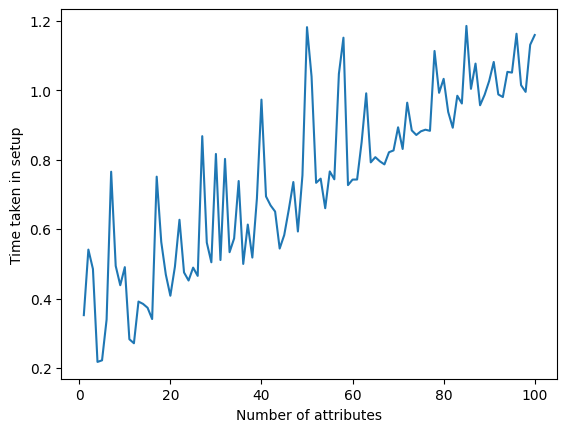

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1,trials+1), setup_execution_times)

# Add labels and title
plt.xlabel('Number of attributes')
plt.ylabel('Time taken in setup')

# Show the plot
plt.show()

In [8]:
import random
import string

def random_string(string_length):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=string_length)).encode('utf-8')
    
# print(random_string(100))

In [11]:
def make_or_policy(attributes):
    if len(attributes) == 1:
        return attributes[0]
    else:
        return f"({attributes[0]} or {make_or_policy(attributes[1:])})"

def make_and_policy(attributes):
    if len(attributes) == 1:
        return attributes[0]
    else:
        return f"({attributes[0]} and {make_or_policy(attributes[1:])})"

In [13]:
trials = 100
message_length = 100
attributes = generate_number_list(trials)
(kpabe,master_public_key, master_key) = setup(attributes)
msg = random_string(message_length)
encrypt_execution_times = []
or_decrypt_execution_times = []
and_decrypt_execution_times = []
or_keygen_execution_times = []
and_keygen_execution_times = []
encryption_attributes = []
for i in range(trials):
    encryption_attributes.append(attributes[i])
    or_policy = make_or_policy(encryption_attributes)
    and_policy = make_and_policy(encryption_attributes)
    or_secret_key = keygen(master_public_key, master_key, or_policy)
    or_keygen_execution_time = timeit.timeit(lambda: keygen(master_public_key, master_key, or_policy), number=10)
    and_secret_key = keygen(master_public_key, master_key, and_policy)
    and_keygen_execution_time = timeit.timeit(lambda: keygen(master_public_key, master_key, and_policy), number=10)
    
    
    cipher_text = encrypt(master_public_key,encryption_attributes,msg)
    encrypt_execution_time = timeit.timeit(lambda: encrypt(master_public_key,attributes,msg), number=10)
    or_decrypt_execution_time = timeit.timeit(lambda: decrypt(cipher_text,or_secret_key), number=10)
    and_decrypt_execution_time = timeit.timeit(lambda: decrypt(cipher_text,and_secret_key), number=10)
    
    
    encrypt_execution_times.append(encrypt_execution_time)
    or_decrypt_execution_times.append(or_decrypt_execution_time)
    and_decrypt_execution_times.append(and_decrypt_execution_time)
    or_keygen_execution_times.append(or_keygen_execution_time)
    and_keygen_execution_times.append(and_keygen_execution_time)

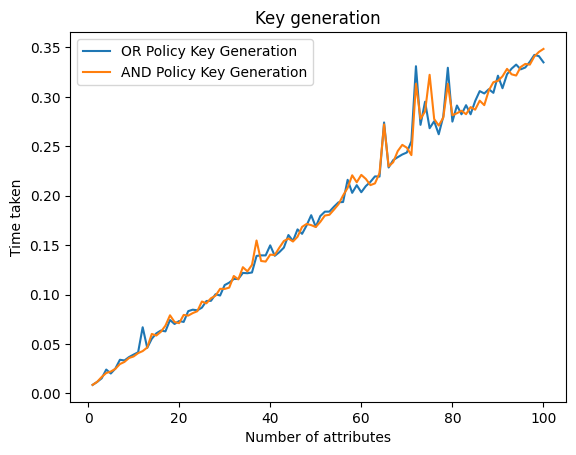

In [16]:
number_of_encryption_attributes = range(1,trials+1)
plt.plot(number_of_encryption_attributes, or_keygen_execution_times, label='OR Policy Key Generation')
plt.plot(number_of_encryption_attributes, and_keygen_execution_times, label='AND Policy Key Generation')


# Add labels and title
plt.xlabel('Number of attributes')
plt.ylabel('Time taken')
plt.title('Key generation')
plt.legend()
# Show the plot
plt.show()

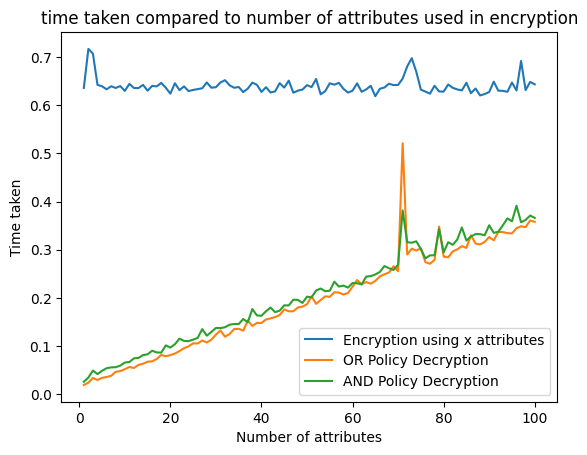

In [19]:
number_of_encryption_attributes = range(1,trials+1)
plt.plot(number_of_encryption_attributes, encrypt_execution_times, label='Encryption using x attributes')
plt.plot(number_of_encryption_attributes, or_decrypt_execution_times, label='OR Policy Decryption')
plt.plot(number_of_encryption_attributes, and_decrypt_execution_times, label='AND Policy Decryption')


# Add labels and title
plt.xlabel('Number of attributes')
plt.ylabel('Time taken')
plt.title('time taken compared to number of attributes used in encryption')
plt.legend()
# Show the plot
plt.show()

In [20]:
trials = 100
attributes = generate_number_list(5)
(kpabe,master_public_key, master_key) = setup(attributes)
or_policy = make_or_policy(attributes)
and_policy = make_and_policy(attributes)
or_secret_key = keygen(master_public_key, master_key, or_policy)
and_secret_key = keygen(master_public_key, master_key, and_policy)

encrypt_execution_times = []
or_decrypt_execution_times = []
and_decrypt_execution_times = []

for i in range(trials):
    msg_length = 10*(i+1)
    msg = random_string(msg_length)
    
    cipher_text = encrypt(master_public_key,attributes,msg)
    encrypt_execution_time = timeit.timeit(lambda: encrypt(master_public_key,attributes,msg), number=10)
    or_decrypt_execution_time = timeit.timeit(lambda: decrypt(cipher_text,or_secret_key), number=10)
    and_decrypt_execution_time = timeit.timeit(lambda: decrypt(cipher_text,and_secret_key), number=10)
    
    encrypt_execution_times.append(encrypt_execution_time)
    or_decrypt_execution_times.append(or_decrypt_execution_time)
    and_decrypt_execution_times.append(and_decrypt_execution_time)

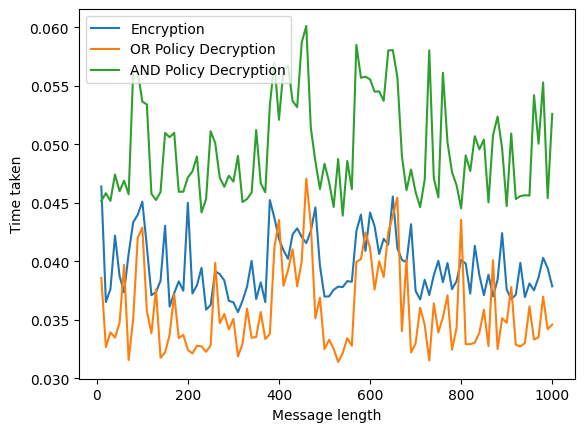

In [21]:
import matplotlib.pyplot as plt

msg_length = list([i*10 for i in range(1, trials+1)])
plt.plot(msg_length, encrypt_execution_times, label='Encryption')
plt.plot(msg_length, or_decrypt_execution_times, label='OR Policy Decryption')
plt.plot(msg_length, and_decrypt_execution_times, label='AND Policy Decryption')

# Add labels and title
plt.legend()
plt.xlabel('Message length')
plt.ylabel('Time taken')

# Show the plot
plt.show()